Используя diabetes-dataset, выполните следующие шаги:

1. Предварительная обработка данных:
— Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.
— Разделите датасет на обучающую и тестовую выборки.

2. Построение модели:
— Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.
— Обучите модель на обучающем наборе данных.

3. Оценка модели:
— Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

In [2]:
import warnings
# warnings.filterwarnings('ignore')
# import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
# Признаки Glucose, BloodPressure, SkinThickness, Insulin, BMI имеют нулевый значения, что не очень возможно.
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
# Correcting missing values in blood pressure
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean()) # There are 35 records with 0 BloodPressure in dataset
# Correcting missing values in BMI
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
# Correct missing values in Insulin and SkinThickness

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

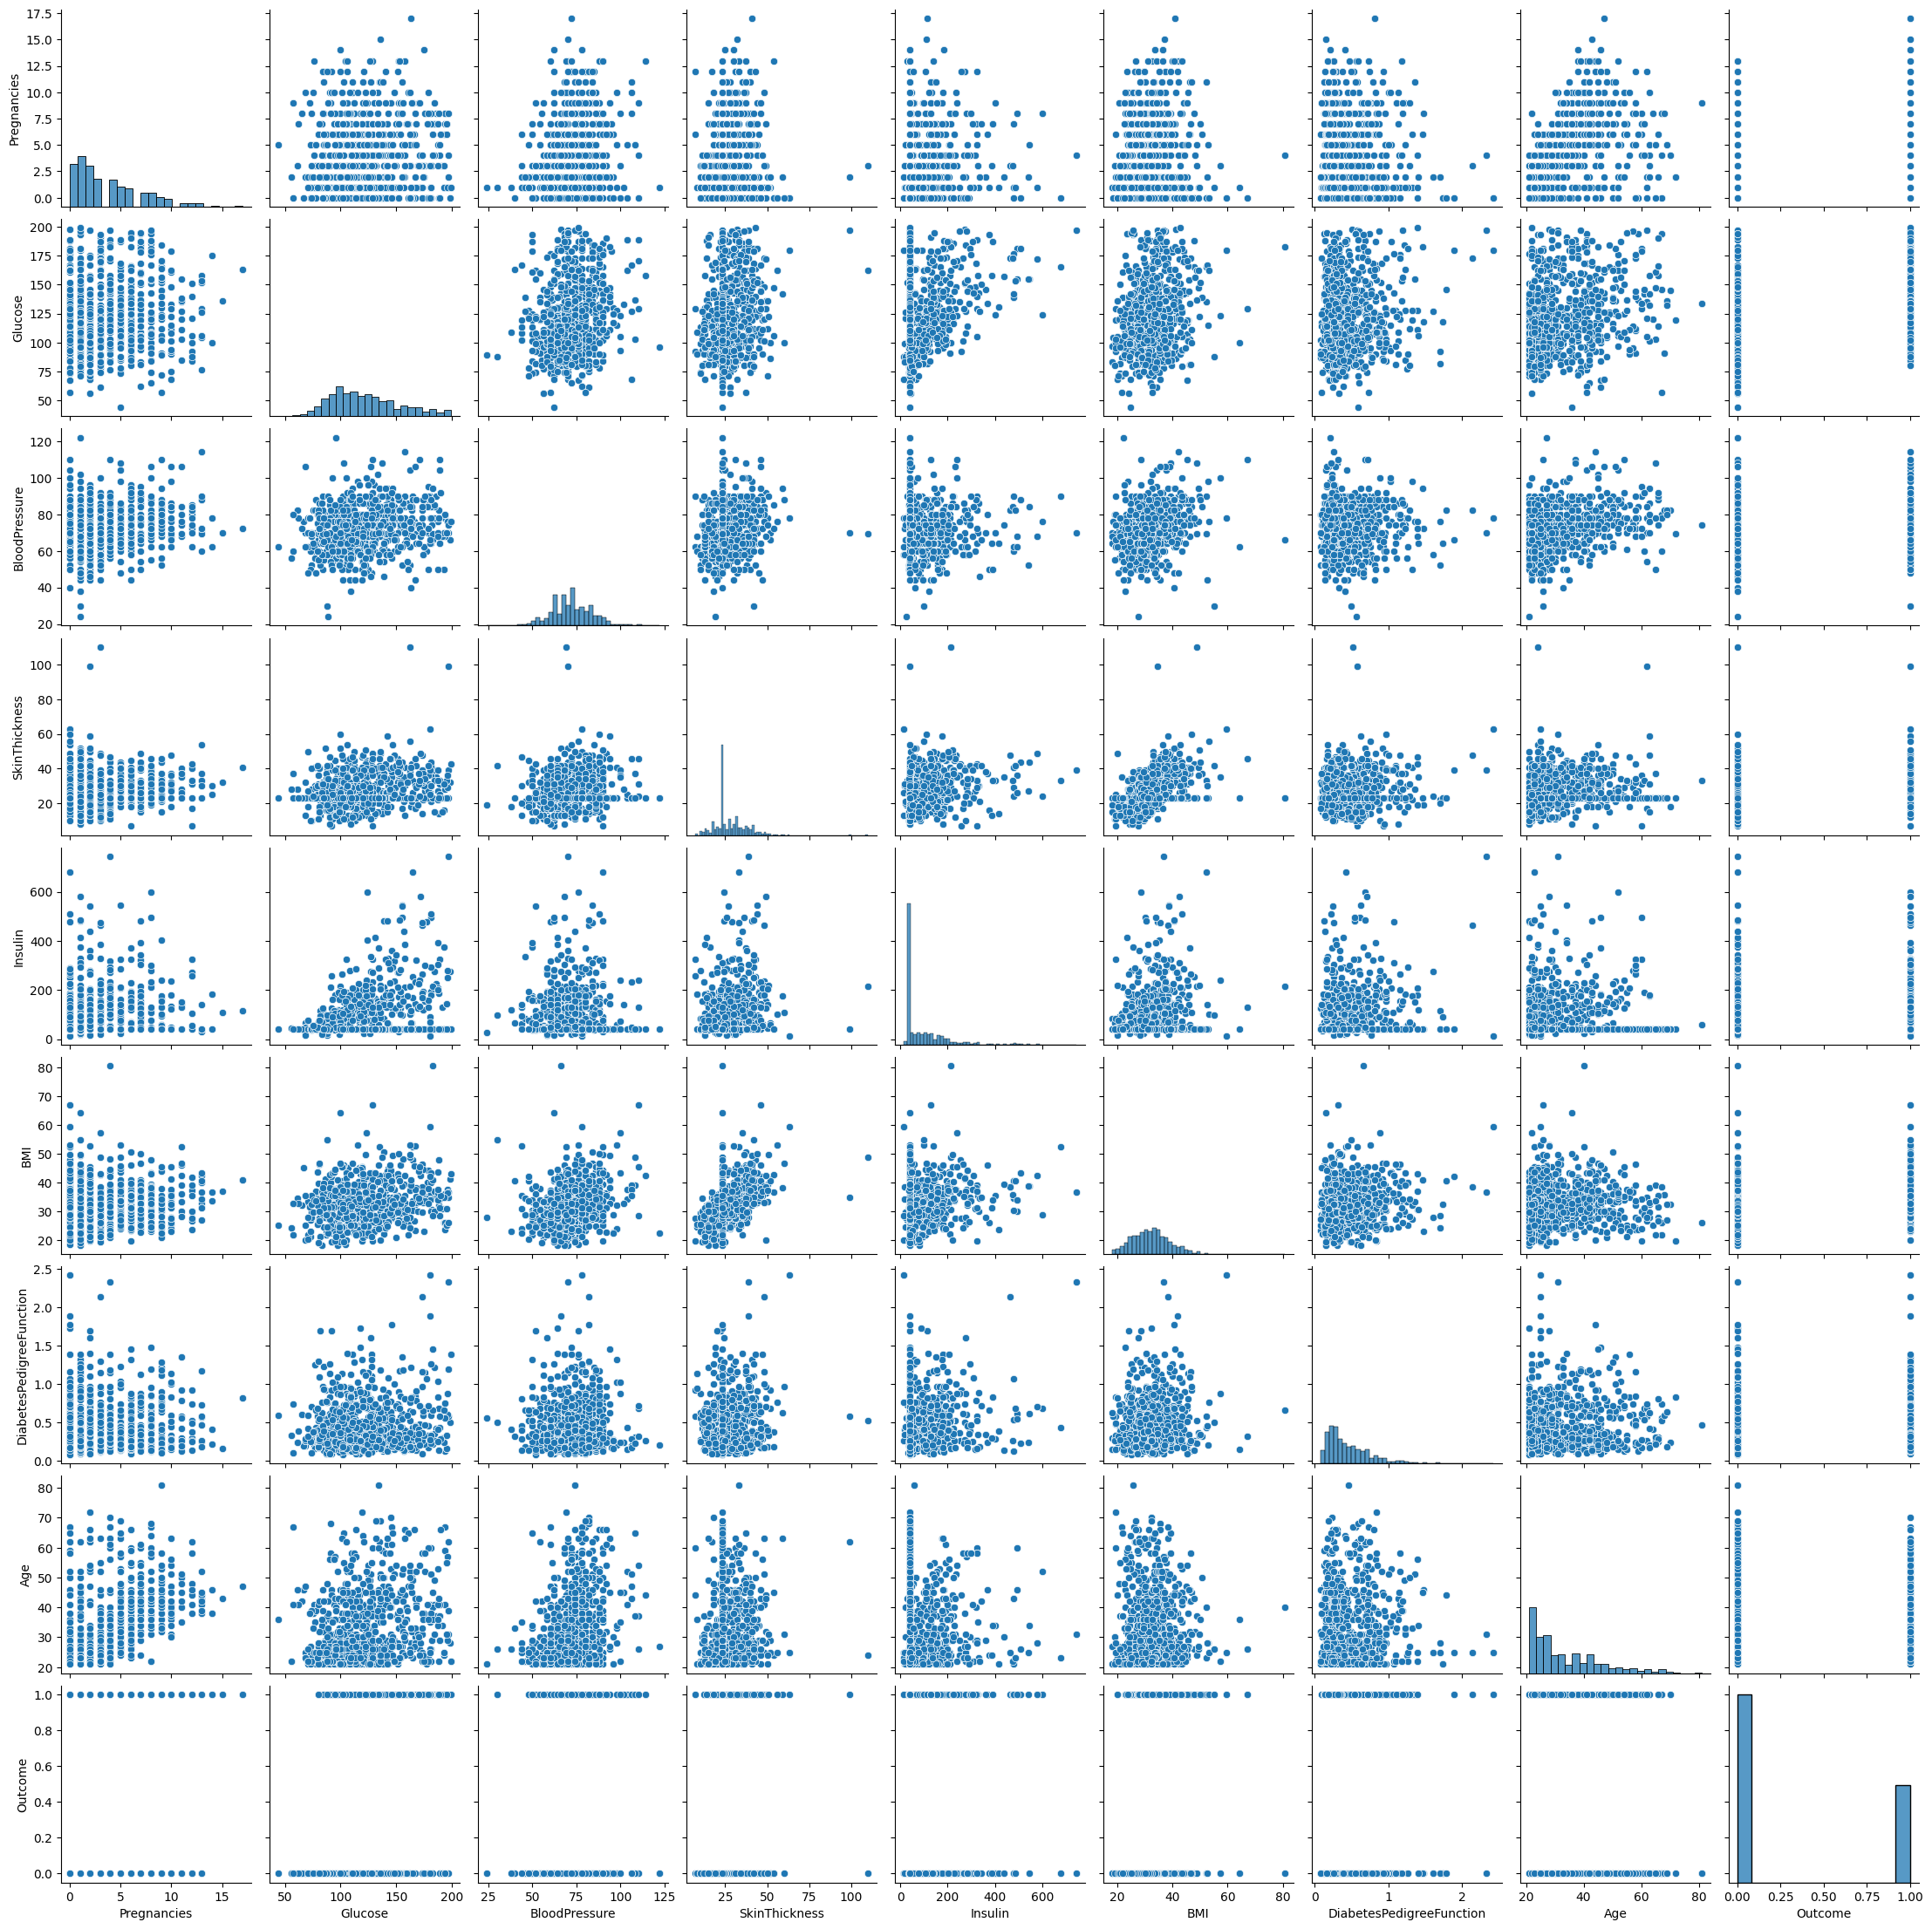

In [9]:
sns.pairplot(df);

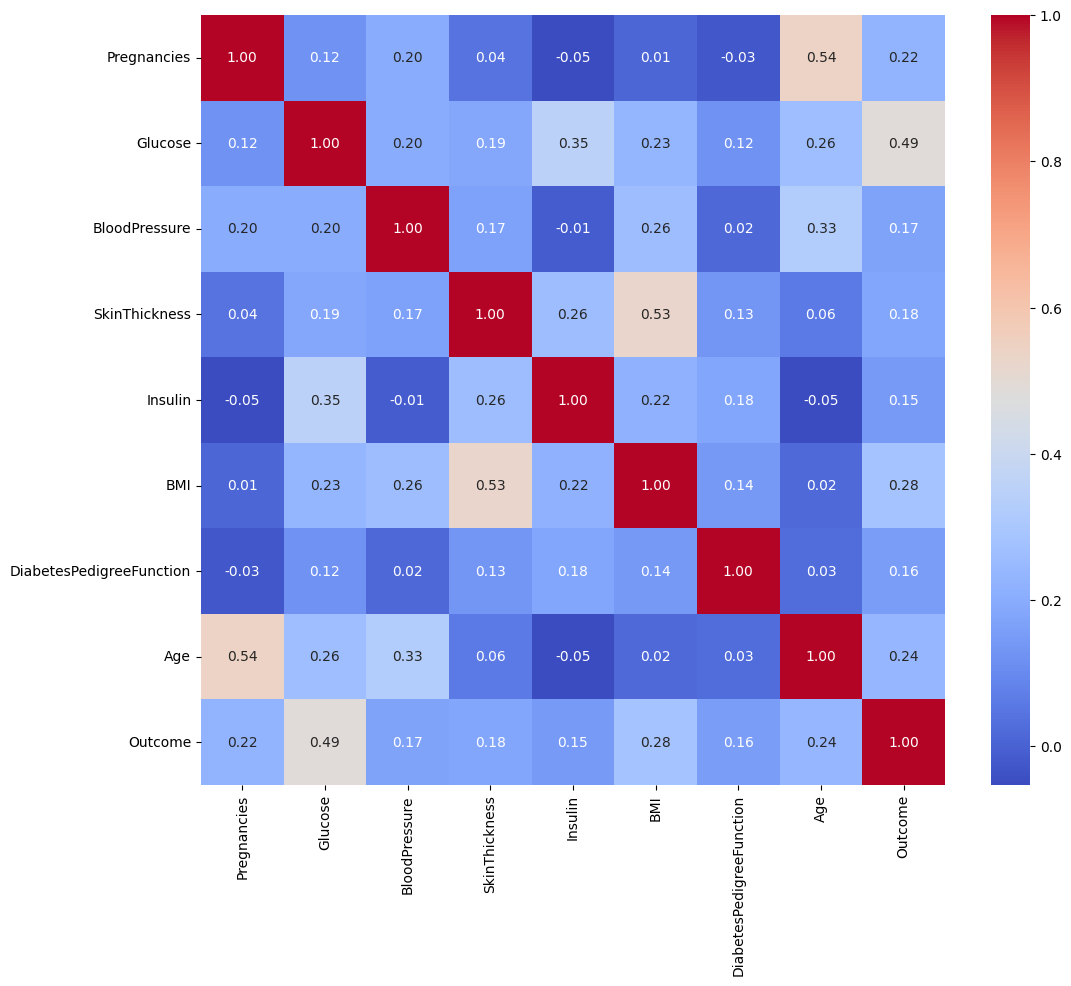

In [10]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show();

In [11]:
scaler = StandardScaler()
X = df.drop('Outcome', axis=1)
X_scaled = scaler.fit_transform(X)
y = df['Outcome']


lg = LogisticRegression()
lg.fit(X_scaled, y)


lg.coef_

array([[ 0.41354721,  1.13258245, -0.03383211,  0.01343495, -0.14631854,
         0.5493733 ,  0.27472888,  0.11315332]])

In [12]:
feature_names = X.columns
coefficients = lg.coef_[0] 

feature_importances = zip(feature_names, coefficients)

feature_importance_list = list(feature_importances)

for feature, coef in feature_importance_list:
    print(f"{feature}: {coef}")

Pregnancies: 0.4135472079675497
Glucose: 1.1325824512266471
BloodPressure: -0.033832114811416146
SkinThickness: 0.013434954608400761
Insulin: -0.14631854062968558
BMI: 0.5493732951266815
DiabetesPedigreeFunction: 0.27472888436914283
Age: 0.11315331870694667


In [ ]:
# Незначительное влияние на целевую переменную оказывают признаки:
# BloodPressure, SkinThickness, Age
# Сильное влияние на целевую переменную оказывают признаки:
# Pregnancies, BMI, Glucose

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression(class_weight='balanced')

In [16]:
model.fit(X_train, y_train)

c:\Users\Alex\My Documents\gb\Python_2022\.python_b_hw\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [17]:
predictions = model.predict(X_test1)

In [19]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.78


In [25]:
precision = precision_score(y_test, predictions, average='binary')
print("Precision:", precision)

Precision: 0.6832298136645962


In [26]:
recall = recall_score(y_test, predictions)
print("Recall:", recall)

Recall: 0.7482993197278912


In [27]:
f1 = f1_score(y_test, predictions)
print("f1:", f1)

f1: 0.7142857142857143
